In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

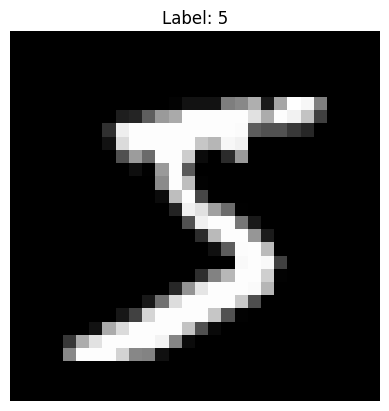

In [ ]:
plt.imshow(x_train[0], cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.axis("off")


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8763 - loss: 0.4267 - val_accuracy: 0.9657 - val_loss: 0.1068
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9668 - loss: 0.1107 - val_accuracy: 0.9750 - val_loss: 0.0829
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9779 - loss: 0.0696 - val_accuracy: 0.9737 - val_loss: 0.0817
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9836 - loss: 0.0530 - val_accuracy: 0.9782 - val_loss: 0.0794
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9871 - loss: 0.0409 - val_accuracy: 0.9740 - val_loss: 0.0807
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9895 - loss: 0.0319 - val_accuracy: 0.9763 - val_loss: 0.0818
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9910 - loss: 0.0295 - val_accuracy: 0.9805 - val_loss: 0.0712
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9934 - loss: 0.0199 - 

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9722 - loss: 0.1341
Test Accuracy: 0.9757000207901001


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

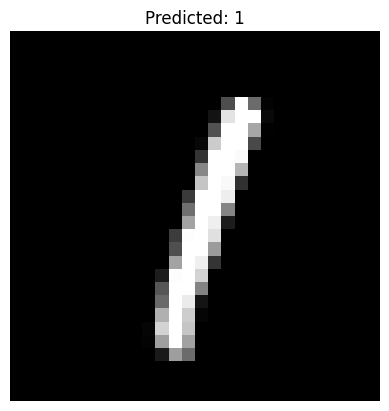

In [ ]:
index = 5  # change index to test different images

prediction = model.predict(x_test[index].reshape(1, -1))
predicted_digit = np.argmax(prediction)

plt.imshow(x_test[index].reshape(28,28), cmap="gray")
plt.title(f"Predicted: {predicted_digit}")
plt.axis("off")


In [ ]:
model.save("handwritten_digit_model.h5")


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("handwritten_digit_model.h5")


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
import base64
import cv2
import numpy as np


In [ ]:
def take_photo(filename='digit.png', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
          const div = document.createElement('div');
          const capture = document.createElement('button');
          capture.textContent = 'Capture';
          div.appendChild(capture);

          const video = document.createElement('video');
          video.style.display = 'block';
          const stream = await navigator.mediaDevices.getUserMedia({video: true});

          document.body.appendChild(div);
          div.appendChild(video);
          video.srcObject = stream;
          await video.play();

          await new Promise((resolve) => capture.onclick = resolve);

          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          canvas.getContext('2d').drawImage(video, 0, 0);

          stream.getVideoTracks()[0].stop();
          div.remove();

          return canvas.toDataURL('image/jpeg', quality);
        }
        ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = base64.b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename


In [ ]:
image_file = take_photo()
print("Image saved as:", image_file)


<IPython.core.display.Javascript object>

Image saved as: digit.png


In [ ]:
img = cv2.imread(image_file)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize to MNIST size
gray = cv2.resize(gray, (28, 28))

# Invert colors (MNIST style)
gray = cv2.bitwise_not(gray)

# Normalize
gray = gray / 255.0

# Flatten
gray = gray.reshape(1, 784)


In [ ]:
prediction = model.predict(gray)
digit = np.argmax(prediction)

print("Predicted Digit:", digit)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted Digit: 5


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

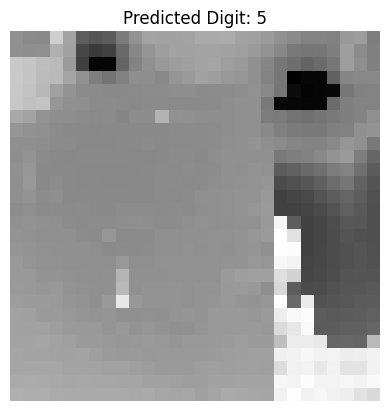

In [ ]:
plt.imshow(gray.reshape(28,28), cmap='gray')
plt.title(f"Predicted Digit: {digit}")
plt.axis('off')


In [ ]:
image_file = take_photo()
print("Image saved as:", image_file)


<IPython.core.display.Javascript object>

Image saved as: digit.png


In [ ]:
img = cv2.imread(image_file)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize to MNIST size
gray = cv2.resize(gray, (28, 28))

# Invert colors (MNIST style)
gray = cv2.bitwise_not(gray)

# Normalize
gray = gray / 255.0

# Flatten
gray = gray.reshape(1, 784)


In [ ]:
prediction = model.predict(gray)
digit = np.argmax(prediction)

print("Predicted Digit:", digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted Digit: 5


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

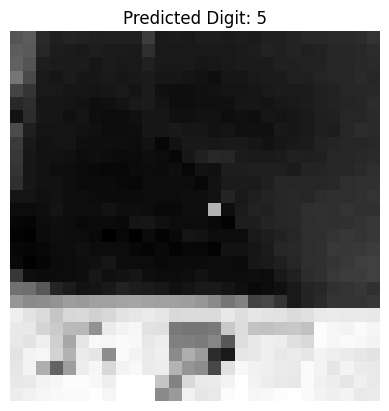

In [ ]:
plt.imshow(gray.reshape(28,28), cmap='gray')
plt.title(f"Predicted Digit: {digit}")
plt.axis('off')

In [ ]:
image_file = take_photo()
print("Image saved as:", image_file)


<IPython.core.display.Javascript object>

Image saved as: digit.png


In [ ]:
img = cv2.imread(image_file)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize to MNIST size
gray = cv2.resize(gray, (28, 28))

# Invert colors (MNIST style)
gray = cv2.bitwise_not(gray)

# Normalize
gray = gray / 255.0

# Flatten
gray = gray.reshape(1, 784)


In [ ]:
prediction = model.predict(gray)
digit = np.argmax(prediction)

print("Predicted Digit:", digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Digit: 5


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

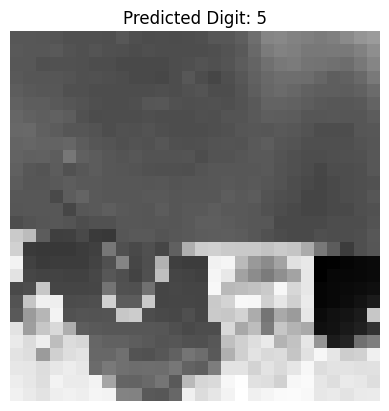

In [ ]:
plt.imshow(gray.reshape(28,28), cmap='gray')
plt.title(f"Predicted Digit: {digit}")
plt.axis('off')